Data Analysis

Pull the following information from NCES Common Core of Data (State, School District (LEA) and School Universe surveys):

In [3]:
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### 1. charter schools by county (Name and NCES id)

In [2]:
# Dataset:
# NCES Annual CCD file - Universe Surveys - School - Year 2013 to 2014
# https://nces.ed.gov/ccd/pubschuniv.asp
# File name 'sc132a.txt' 

In [4]:
# Read file
df_school = pd.read_table('sc132a.txt')
print df_school.head()
print df_school.shape

   SURVYEAR      NCESSCH  FIPST   LEAID  SCHNO STID SEASCH  \
0      2013  10000200277      1  100002    277  210     20   
1      2013  10000201402      1  100002   1402  210     25   
2      2013  10000201667      1  100002   1667  210     50   
3      2013  10000201670      1  100002   1670  210     60   
4      2013  10000201705      1  100002   1705  210     30   

                    LEANM                            SCHNAM       PHONE  \
0  ALABAMA YOUTH SERVICES  SEQUOYAH SCH - CHALKVILLE CAMPUS  2056808574   
1  ALABAMA YOUTH SERVICES      EUFAULA SCH - EUFAULA CAMPUS  3346874441   
2  ALABAMA YOUTH SERVICES                             CAMPS  3342153850   
3  ALABAMA YOUTH SERVICES                           DET CTR  3342153850   
4  ALABAMA YOUTH SERVICES     WALLACE SCH - MT MEIGS CAMPUS  3342156039   

      ...     HPALM HPALF TR  TRALM  TRALF TOTETH VIRTUALSTAT NSLPSTATUS  \
0     ...        -1    -1 -1     -1     -1     -1   VIRTUALNO          M   
1     ...        -2    -

C:\Users\jhuan\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (5,6,9,22,23,26,28,54,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Check Charter Status Unique Values
print df_school['CHARTR'].unique()
print df_school['CHARTR'].astype("str").unique()

['N' '2' '1' 2L 1L 'M']
['N' '2' '1' 'M']


In [5]:
# Column 'CHARTR' value at 1 means charter school
# Data type: Results above show some '1' are string type while some '1' are numeric 

In [6]:
# Slice data by 'CHARTR' equals 1

subset1_1 = df_school[(df_school['CHARTR'] == '1')]
a = len(subset1_1)
subset1_2 = df_school[(df_school['CHARTR'] == 1)]
b = len(subset1_2)

subset1 = df_school[(df_school['CHARTR'].astype("str") == '1')]
print a
print b
print subset1.shape

888
6046
(6934, 312)


In [7]:
# Only keep columns: 'NCESSCH' (NCES id) 'CONUM' (county id), 'CONAME' (county name) 'SCHNAM' (school name) and 'CHARTR' (charter status)
subset1_result = subset1[['NCESSCH', 'CONUM', 'CONAME', 'SCHNAM', 'CHARTR']]
print subset1_result.head()
print subset1_result.shape

          NCESSCH CONUM                     CONAME  \
1651  20000100329  2050         BETHEL CENSUS AREA   
1751  20015000306  2130  KETCHIKAN GATEWAY BOROUGH   
1754  20015000523  2130  KETCHIKAN GATEWAY BOROUGH   
1822  20018000172  2020     ANCHORAGE MUNICIPALITY   
1823  20018000178  2020     ANCHORAGE MUNICIPALITY   

                                                 SCHNAM CHARTR  
1651                                AYAPRUN ELITNAURVIK      1  
1751                           KETCHIKAN CHARTER SCHOOL      1  
1754  TONGASS SCHOOL OF ARTS AND SCIENCES CHARTER SC...      1  
1822                            AQUARIAN CHARTER SCHOOL      1  
1823                  FAMILY PARTNERSHIP CHARTER SCHOOL      1  
(6934, 5)


In [8]:
# Sort data by county id 'CONUM', then export datafrane to csv as result
subset1_result = subset1_result.sort_values(by = "CONUM")
print subset1_result[:10]
subset1_result.to_csv("result1.csv", index = False)

          NCESSCH CONUM                        CONAME  \
1822  20018000172  2020        ANCHORAGE MUNICIPALITY   
1823  20018000178  2020        ANCHORAGE MUNICIPALITY   
1833  20018000459  2020        ANCHORAGE MUNICIPALITY   
1834  20018000460  2020        ANCHORAGE MUNICIPALITY   
1839  20018000530  2020        ANCHORAGE MUNICIPALITY   
1844  20018000555  2020        ANCHORAGE MUNICIPALITY   
1851  20018000732  2020        ANCHORAGE MUNICIPALITY   
1852  20018000736  2020        ANCHORAGE MUNICIPALITY   
1651  20000100329  2050            BETHEL CENSUS AREA   
2024  20060000162  2090  FAIRBANKS NORTH STAR BOROUGH   

                                     SCHNAM CHARTR  
1822                AQUARIAN CHARTER SCHOOL      1  
1823      FAMILY PARTNERSHIP CHARTER SCHOOL      1  
1833                     WINTERBERRY SCHOOL      1  
1834           EAGLE ACADEMY CHARTER SCHOOL      1  
1839                FRONTIER CHARTER SCHOOL      1  
1844      HIGHLAND TECH HIGH CHARTER SCHOOL      1  
1

#### 2. number of schools in each district, broken down by school type and state (Count, Type and State)

In [9]:
# A school district is also referred to as a Local Education Agency (LEA)

In [10]:
# Check Unique Values of 'States' - column 'LSTATE' means state of school location 
print df_school['LSTATE'].unique()
print len(df_school['LSTATE'].unique())

# Check school type unique values
print
print df_school['TYPE'].unique()

['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'MD' 'FL' 'GA' 'HI' 'ID' 'OR'
 'IL' 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE' 'NV'
 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'PA' 'OK' 'RI' 'SC' 'SD' 'TN' 'TX' 'UT'
 'VT' 'VA' 'WA' 'WV' 'WI' 'WY' 'AS' 'AE' 'AP' 'PR' 'GU' 'MP' 'VI']
58

[4 1 3 2 5]


In [11]:
# Only keep columns'LEAID' (LEA id), 'LSTATE' (Location State (P.O. Abbreviation) and 'TYPE' (School Type Code)
subset2 = df_school[['LEAID', 'LSTATE', 'TYPE']]
print subset2.shape

(102815, 3)


In [12]:
# for loop to count school numbers
# c is state indicator, d is school type indicator
# store data in final result dataframe subset2_result

c = ''
d = 0
subset2_result = pd.DataFrame()

# for loop of states
for c in subset2['LSTATE'].unique():
    subset2_state = subset2[(subset2['LSTATE'] == c)]
    
    # for loop of schooltype:
    for d in xrange(1, 6):
        subset2_schooltype = subset2_state[(subset2_state['TYPE'] == d)]
        
        # Count school districts
        subset2_district = subset2_schooltype['LEAID'].value_counts()
        subset2_1 = subset2_district.reset_index()
        subset2_2 = subset2_1.rename(columns={'index':'LEAID', 'LEAID':'Count'})
        subset2_3 = subset2_2.sort_values(by = 'LEAID')
        
        # Add state and school type info and store result to final dataframe
        # Add the 'STATE' column as the first column from the left and 'TYPE' as second column from the left
        subset2_3.insert(0, 'STATE', c)
        subset2_3.insert(1, 'TYPE', d)
        subset2_result = pd.concat([subset2_result, subset2_3])

In [13]:
# Export datafrane to csv as result
print subset2_result.shape
print subset2_result[:10]
print subset2_result[231 : 241]
subset2_result.to_csv("result2.csv", index = False)

(21510, 4)
    STATE  TYPE   LEAID  Count
139    AL     1  100002      1
78     AL     1  100005      6
24     AL     1  100006     14
20     AL     1  100007     16
33     AL     1  100008     11
120    AL     1  100011      3
91     AL     1  100012      5
93     AL     1  100013      4
136    AL     1  100016      1
137    AL     1  100028      1
   STATE  TYPE   LEAID  Count
2     AL     4  100002      6
29    AL     4  100006      1
28    AL     4  100007      1
26    AL     4  100009      1
11    AL     4  100015      2
20    AL     4  100018      1
23    AL     4  100020      1
42    AL     4  100035      1
66    AL     4  100038      1
64    AL     4  100044      1


#### 3. districts with Special Education schools that have been opened since the time of the last report (District Name and NCES id)

In [14]:
# Only keep column 'TYPE' (School Type Code), 'STATUS' (Operation Status Code), 'NCESSCH' (NCES id) and 'LEANM' (dsitrict name)
subset3 = df_school[['TYPE', 'STATUS', 'NCESSCH', 'LEANM']]
subset3.shape

(102815, 4)

In [15]:
# Special Education School - School Type Code 'TYPE' == 2
# Have been opened since the time of the last report - Operation Status Code 'STATUS' == 3
# Slice data accordingly

subset3_result = subset3[(subset3['TYPE'] == 2) & (subset3['STATUS'] == 3)]
subset3_result.shape

(55, 4)

In [16]:
# Export datafrane to csv as result
print subset3_result.head()
subset3_result.to_csv("result3.csv", index = False)

       TYPE  STATUS      NCESSCH                            LEANM
6937      2       3  60363013672                 BAKERSFIELD CITY
8896      2       3  61440013675                  FREMONT UNIFIED
9281      2       3  61623013677             GROSSMONT UNION HIGH
9282      2       3  61623013711             GROSSMONT UNION HIGH
15824     2       3  69101413724  LAKE COUNTY OFFICE OF EDUCATION


#### 4. Top 10 states by number of schools

In [17]:
# Count the times each state's name appears in the record
# Find top 10 states
subset4 = df_school["LSTATE"].value_counts()[:10]
print subset4

CA    10462
TX     9336
NY     4910
FL     4416
IL     4304
OH     3783
MI     3678
PA     3173
NC     2654
NJ     2615
Name: LSTATE, dtype: int64


In [18]:
# Export result as csv
subset4.to_csv("result4.csv")

Using the LEA Finance Survey from NCES Common Core of Data:

#### 5. Top 10 districts in each state by field ‘E13 - CURRENT EXPENDITURES - INSTRUCTION’

In [19]:
# Dataset:
# NCES Annual CCD file - Finance - School District (LEA) - Year 2012 to 2013
# https://nces.ed.gov/ccd/f33agency.asp
# Name of data file downloaded is 'sdf13_1a.txt' 

In [20]:
# Read file
df_LEAFinance = pd.read_table('sdf13_1a.txt')
print df_LEAFinance.head()
print df_LEAFinance.shape

    LEAID        CENSUSID  FIPST  CONUM  CSA   CBSA                    NAME  \
0  100002               N      1   1101    N  33860  ALABAMA YOUTH SERVICES   
1  100005  01504840100000      1   1095  290  10700        ALBERTVILLE CITY   
2  100006  01504800100000      1   1095  290  10700         MARSHALL COUNTY   
3  100007  01503740100000      1   1073  142  13820             HOOVER CITY   
4  100008  01504530100000      1   1089  290  26620            MADISON CITY   

    STNAME STABBR SCHLEV   ...   FL_31F  FL_41F  FL_61V  FL_66V FL_W01 FL_W31  \
0  Alabama     AL      N   ...        M       M       M       M      M      M   
1  Alabama     AL     03   ...        R       I       M       M      R      R   
2  Alabama     AL     03   ...        R       I       M       M      R      R   
3  Alabama     AL     03   ...        R       I       M       M      R      R   
4  Alabama     AL     03   ...        R       I       M       M      R      R   

   FL_W61  FL_HR1  FL_HE1  FL_HE2  
0 

C:\Users\jhuan\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (0,10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
# Check Unique Values of 'States' - column 'STNAME'
print df_LEAFinance['STNAME'].unique()
print
print len(df_LEAFinance['STNAME'].unique())

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']

51


In [22]:
# Only keep column 'LEAID' (School District ID), 'NAME' (School District Name), 'STNAME' (State Name), and 'E13' (CURRENT EXPENDITURES - INSTRUCTION)
subset5 = df_LEAFinance[['LEAID', 'NAME', 'STNAME', 'E13']]
print subset5.head()
subset5.shape

    LEAID                    NAME   STNAME       E13
0  100002  ALABAMA YOUTH SERVICES  Alabama        -1
1  100005        ALBERTVILLE CITY  Alabama  20625000
2  100006         MARSHALL COUNTY  Alabama  27095000
3  100007             HOOVER CITY  Alabama  88840000
4  100008            MADISON CITY  Alabama  49283000


(18477, 4)

In [23]:
# for loop for each state to sort top 10 districts by 'E13'

# e as state indicator
e = ''
# subset5_result as dataframe to store final result
subset5_result = pd.DataFrame()

for e in df_LEAFinance['STNAME'].unique():
    subset5_state = subset5[(subset5['STNAME'] == e)]
    
    #Sort 'E13' descendingly to get top 10
    subset5_sorted = subset5_state.sort_values(by = 'E13', ascending = False)
    subset5_top10 = subset5_sorted[:10]
    
    #Store result to dataframe g
    subset5_result = pd.concat([subset5_result, subset5_top10])
print subset5_result.shape
print subset5_result[:15]

(501, 4)
      LEAID                                          NAME   STNAME        E13
129  102370                                 MOBILE COUNTY  Alabama  273846000
115  101920                              JEFFERSON COUNTY  Alabama  179942000
131  102430                             MONTGOMERY COUNTY  Alabama  147137000
153  103030                                 SHELBY COUNTY  Alabama  139977000
57   100270                                BALDWIN COUNTY  Alabama  139776000
61   100390                               BIRMINGHAM CITY  Alabama  136788000
111  101800                               HUNTSVILLE CITY  Alabama  133368000
125  102220                                MADISON COUNTY  Alabama   94079000
3    100007                                   HOOVER CITY  Alabama   88840000
165  103390                             TUSCALOOSA COUNTY  Alabama   79399000
190  200180                     ANCHORAGE SCHOOL DISTRICT   Alaska  439272000
201  200510     MATANUSKA-SUSITNA BOROUGH SCHOOL DISTRI

In [24]:
# Note: The reason that result g dataframe has only 501 records instead of 510 (51*10) is 'Hawaii' state has only one record 
# (LEAID: 1500030, Hawaii Department of Education)

In [25]:
subset5_result.to_csv("result5.csv", index = False)

#### 6. Top 10 districts in each state by total of fields E13, E17, E07, E08, E09, V85, V65, V93

In [26]:
# Only keep column 'LEAID' (School District ID), 'NAME' (School District Name), 'STNAME' (State Name), 
# And 'E13', 'E17', 'E07', 'E08', 'E09', 'V85', 'V65', 'V93')
subset6 = df_LEAFinance[['LEAID', 'NAME', 'STNAME', 'E13', 'E17', 'E07', 'E08', 'E09', 'V85', 'V65', 'V93']]
print subset6.head()
subset6.shape

    LEAID                    NAME   STNAME       E13      E17      E07  \
0  100002  ALABAMA YOUTH SERVICES  Alabama        -1       -1       -1   
1  100005        ALBERTVILLE CITY  Alabama  20625000  2119000   777000   
2  100006         MARSHALL COUNTY  Alabama  27095000  3179000  2568000   
3  100007             HOOVER CITY  Alabama  88840000  7940000  5923000   
4  100008            MADISON CITY  Alabama  49283000  5324000  5520000   

       E08      E09  V85  V65      V93  
0       -1       -1   -1   -1       -1  
1  1231000  2205000    0    0   248000  
2  1614000  3578000    0    0   474000  
3  1530000  9165000    0    0  1289000  
4  1173000  4460000    0    0  1777000  


(18477, 11)

In [27]:
# Create a column named 'Sum' as total of fields E13, E17, E07, E08, E09, V85, V65, V93
# Use dataframe sum function, set 'axis = 1' to get total of row
subset6.loc[:, 'Sum'] = subset6[['E13', 'E17', 'E07', 'E08', 'E09', 'V85', 'V65', 'V93']].sum(axis = 1)
print subset6[:10]

    LEAID                    NAME   STNAME       E13      E17      E07  \
0  100002  ALABAMA YOUTH SERVICES  Alabama        -1       -1       -1   
1  100005        ALBERTVILLE CITY  Alabama  20625000  2119000   777000   
2  100006         MARSHALL COUNTY  Alabama  27095000  3179000  2568000   
3  100007             HOOVER CITY  Alabama  88840000  7940000  5923000   
4  100008            MADISON CITY  Alabama  49283000  5324000  5520000   
5  100009  AL INST DEAF AND BLIND  Alabama        -2       -2       -2   
6  100011              LEEDS CITY  Alabama   8514000   867000   416000   
7  100012               BOAZ CITY  Alabama  10758000   975000   868000   
8  100013         TRUSSVILLE CITY  Alabama  21265000  2221000  1298000   
9  100015       SAFETYNET ACADEMY  Alabama        -2       -2       -2   

       E08      E09  V85  V65      V93        Sum  
0       -1       -1   -1   -1       -1         -8  
1  1231000  2205000    0    0   248000   27205000  
2  1614000  3578000    0    0

C:\Users\jhuan\Anaconda2\lib\site-packages\pandas\core\indexing.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\jhuan\Anaconda2\lib\site-packages\pandas\core\indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [28]:
# for loop for each state to sort top 10 districts by 'Sum'

# g as state indicator
g = ''
# subset6_result as dataframe to store final result
subset6_result = pd.DataFrame()

for g in df_LEAFinance['STNAME'].unique():
    subset6_state = subset6[(subset6['STNAME'] == g)]
    
    #Sort 'Sum' descendingly to get top 10
    subset6_sorted = subset6_state.sort_values(by = 'Sum', ascending = False)
    subset6_top10 = subset6_sorted[:10]
    
    #Store result to dataframe g
    subset6_result = pd.concat([subset6_result, subset6_top10])
print subset6_result.shape
print subset6_result[:15]

(501, 12)
      LEAID                                          NAME   STNAME        E13  \
129  102370                                 MOBILE COUNTY  Alabama  273846000   
115  101920                              JEFFERSON COUNTY  Alabama  179942000   
131  102430                             MONTGOMERY COUNTY  Alabama  147137000   
61   100390                               BIRMINGHAM CITY  Alabama  136788000   
57   100270                                BALDWIN COUNTY  Alabama  139776000   
153  103030                                 SHELBY COUNTY  Alabama  139977000   
111  101800                               HUNTSVILLE CITY  Alabama  133368000   
125  102220                                MADISON COUNTY  Alabama   94079000   
3    100007                                   HOOVER CITY  Alabama   88840000   
165  103390                             TUSCALOOSA COUNTY  Alabama   79399000   
190  200180                     ANCHORAGE SCHOOL DISTRICT   Alaska  439272000   
201  200510     MA

In [29]:
# Note: The reason that result i dataframe has 501 records is the same as task 5: Hawaii has only one record.
# (LEAID: 1500030, Hawaii Department of Education)

In [30]:
subset6_result.to_csv("result6.csv", index = False)

### Data Visualization    

#### * Histogram - Count of districts by type

In [31]:
# Choosing dataset:
# NCES Annual CCD file - Universe Surveys - School District (LEA) - Year 2013 to 2014
# https://nces.ed.gov/ccd/pubagency.asp
# Name of data file downloaded is 'ag131a_supp.txt' 

In [32]:
# Read file
df_LEA = pd.read_table('ag131a_supp.txt')
print df_LEA.head()
print df_LEA.shape

   SURVYEAR   LEAID  FIPST STID                    NAME       PHONE  \
0      2013  100002      1  210  ALABAMA YOUTH SERVICES  3342153850   
1      2013  100005      1  101        ALBERTVILLE CITY  2568911183   
2      2013  100006      1   48         MARSHALL COUNTY  2565823171   
3      2013  100007      1  158             HOOVER CITY  2054391015   
4      2013  100008      1  169            MADISON CITY  2564648370   

                   MSTREE         MCITY MSTATE   MZIP     ...      WHALM  \
0              P O BOX 66      MT MEIGS     AL  36057     ...         -1   
1        107 WEST MAIN ST   ALBERTVILLE     AL  35950     ...       1272   
2  12380 US HIGHWAY 431 S  GUNTERSVILLE     AL  35976     ...       2359   
3   2810 METROPOLITAN WAY        HOOVER     AL  35243     ...       4332   
4        211 CELTIC DRIVE       MADISON     AL  35758     ...       3131   

  WHALF PACIFIC HPALM  HPALF   TR  TRALM TRALF TOTETH CHRTLEASTAT  
0    -1      -1    -1     -1   -1     -1    -1  

C:\Users\jhuan\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (3,5,17,18,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
# Statistical Preview - Provide configuration details for plot
# Count column 'TYPE' (Education Agency Type Code) by values 
subset7 = df_LEA["TYPE"].value_counts()

# Reset index to reset 'TYPE' value in a column, rename columns and sort by 'TYPE' value
subset7_1 = subset7.reset_index()
subset7_2 = subset7_1.rename(columns={'index':'TYPE', 'TYPE':'Frequency'})
subset7_3 = subset7_2.sort_values(by = 'TYPE')
print subset7
print
print subset7_3

1    13078
7     3005
4     1352
2      694
5      267
3      221
8      149
6       19
Name: TYPE, dtype: int64

   TYPE  Frequency
0     1      13078
3     2        694
5     3        221
2     4       1352
4     5        267
7     6         19
1     7       3005
6     8        149


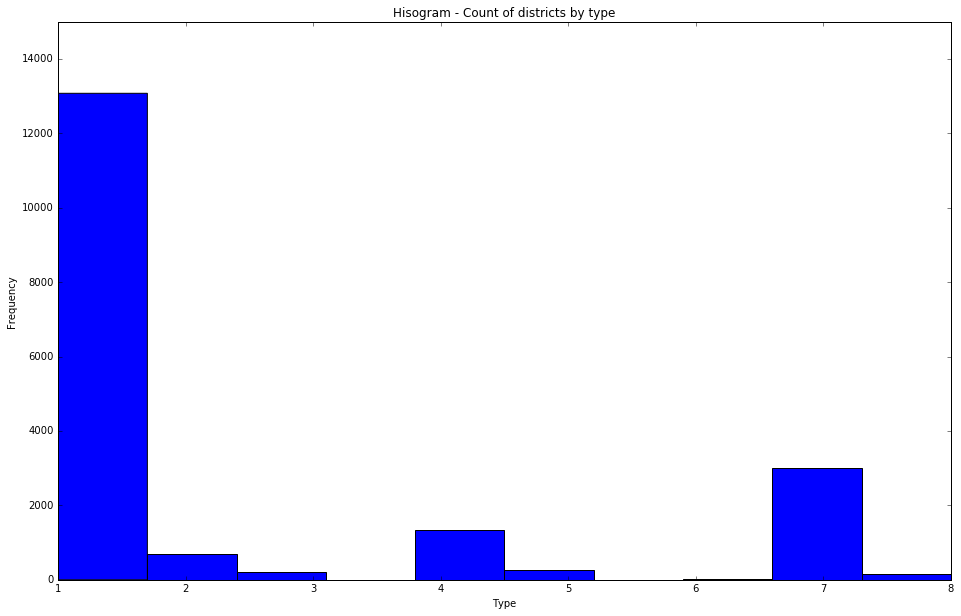

In [34]:
# Plot Histogram: Count of districts by type

#Configuration
fig, ax = plt.subplots(figsize = (16, 10))
ID = 'Hisogram - Count of districts by type'
ax.set_title('%s' %ID)
ax.set_xlabel('Type')
ax.set_ylabel('Frequency')
ax.set_xlim([1, 8])
ax.set_ylim([0, 15000])

#Plot Histrogram
plt.hist(df_LEA["TYPE"])

# Save Plot
filename = '7_%s.jpg' %ID
plt.savefig(filename)

#### * Count of schools by lowest grade offered

In [35]:
# Statistical Preview - Provide configuration details for plot
# Count column 'GSLO' (School low grade offered) by values 
subset8 = df_school["GSLO"].value_counts()

# Reset index to reset 'TYPE' value in a column, rename columns and sort by 'TYPE' value
subset8_1 = subset8.reset_index()
subset8_2 = subset8_1.rename(columns={'index':'GSLO', 'GSLO':'Frequency'})
subset8_3 = subset8_2.sort_values(by = 'Frequency', ascending = False)
print subset8
print
print subset8_3

PK    29405
KG    25398
09    16550
06    12593
07     6111
N      3765
05     2700
03     1541
04     1249
01     1038
10      770
08      627
02      605
11      205
12      137
UG      121
Name: GSLO, dtype: int64

   GSLO  Frequency
0    PK      29405
1    KG      25398
2    09      16550
3    06      12593
4    07       6111
5     N       3765
6    05       2700
7    03       1541
8    04       1249
9    01       1038
10   10        770
11   08        627
12   02        605
13   11        205
14   12        137
15   UG        121


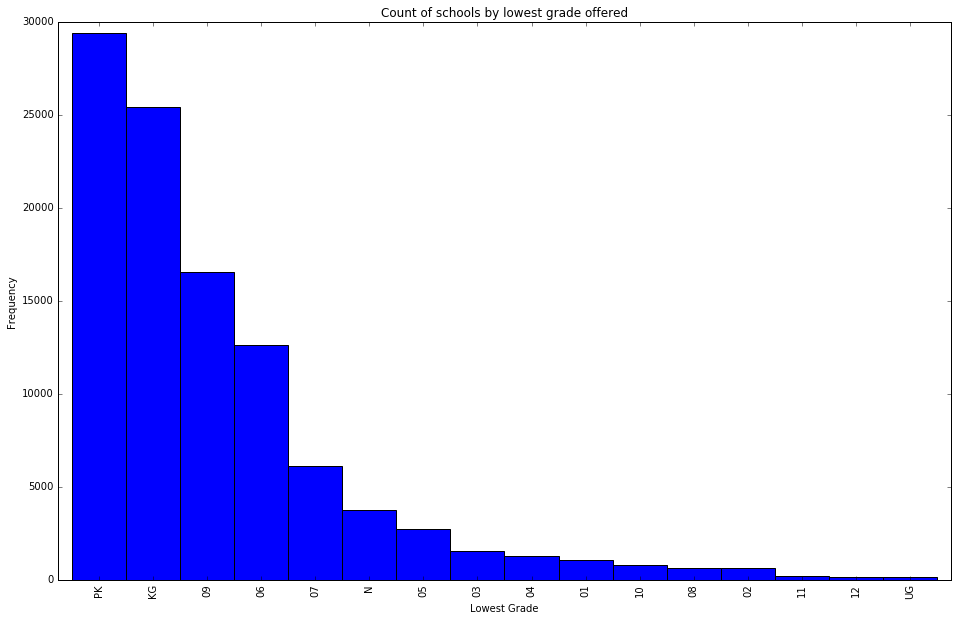

In [36]:
# Notice Grade 'KG', 'N', 'PK' and 'UG' are not numeric, use bar plot function here:
# Plot: Count of schools by lowest grade offered

#Configuration
fig, ax = plt.subplots(figsize = (16, 10))
ID = 'Count of schools by lowest grade offered'
ax.set_title('%s' %ID)
ax.set_xlabel('Lowest Grade')
ax.set_ylabel('Frequency')
#ax.set_xlim([1, 8])
ax.set_ylim([0, 30000])


#Plot
df_school['GSLO'].value_counts().plot(kind= 'bar', width = 1)

# Save Plot
filename = '8_%s.jpg' %ID
plt.savefig(filename)

#### * Count of schools by highest grade offered

In [37]:
# Statistical Preview - Provide configuration details for plot
# Count column 'GSHI' (School high grade offered) by values 
subset9 = df_school["GSHI"].value_counts()

# Reset index to reset 'TYPE' value in a column, rename columns and sort by 'TYPE' value
subset9_1 = subset9.reset_index()
subset9_2 = subset9_1.rename(columns={'index':'GSHI', 'GSHI':'Frequency'})
subset9_3 = subset9_2.sort_values(by = 'Frequency', ascending = False)
print subset9
print
print subset9_3

05    26968
12    26497
08    21220
06    12423
04     3993
N      3765
02     1575
03     1561
09     1256
PK     1208
07      540
KG      537
01      532
10      313
11      306
UG      121
Name: GSHI, dtype: int64

   GSHI  Frequency
0    05      26968
1    12      26497
2    08      21220
3    06      12423
4    04       3993
5     N       3765
6    02       1575
7    03       1561
8    09       1256
9    PK       1208
10   07        540
11   KG        537
12   01        532
13   10        313
14   11        306
15   UG        121


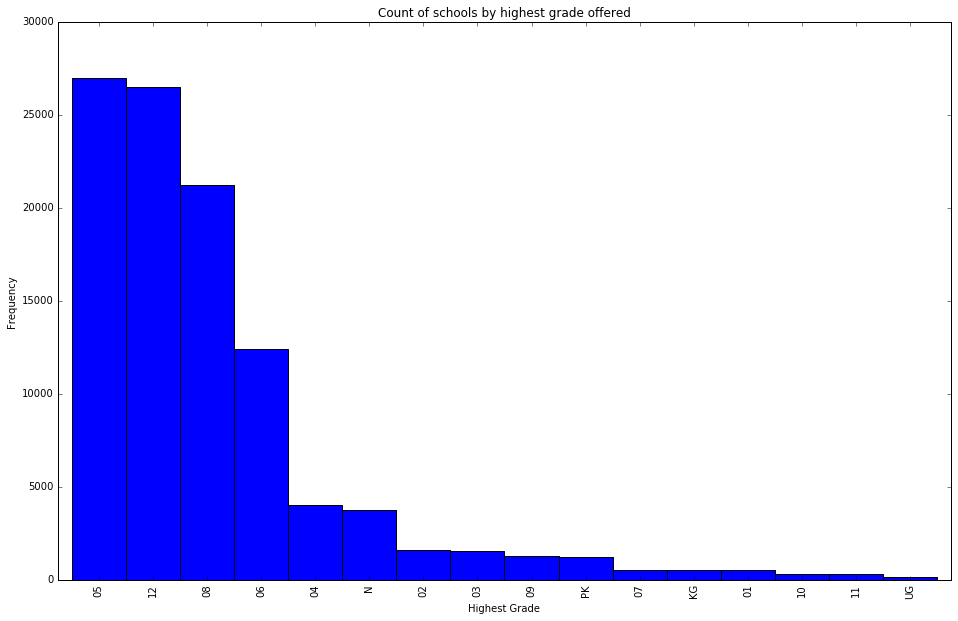

In [38]:
# Notice Grade 'KG', 'N', 'PK' and 'UG' are not numeric, use bar plot function here:
# Plot: Count of schools by highest grade offered

#Configuration
fig, ax = plt.subplots(figsize = (16, 10))
ID = 'Count of schools by highest grade offered'
ax.set_title('%s' %ID)
ax.set_xlabel('Highest Grade')
ax.set_ylabel('Frequency')
ax.set_ylim([0, 30000])

#Plot
df_school['GSHI'].value_counts().plot(kind= 'bar', width = 1)

# Save Plot
filename = '9_%s.jpg' %ID
plt.savefig(filename)

#### Bar chart:

* States by top district by ‘E13 - CURRENT EXPENDITURES - INSTRUCTION’

In [39]:
# Use 'Finance - School District (LEA) - Year 2012 to 2013' data file in task 5
# Only keep column 'STNAME' (State Name), and 'E13' (CURRENT EXPENDITURES - INSTRUCTION)
subset10 = df_LEAFinance[['STNAME', 'E13']]
print subset10.head()
subset10.shape

    STNAME       E13
0  Alabama        -1
1  Alabama  20625000
2  Alabama  27095000
3  Alabama  88840000
4  Alabama  49283000


(18477, 2)

In [40]:
statelist = []
scorelist = []

# Get top 'E13' score for each state
for e in df_LEAFinance['STNAME'].unique():
    statelist.append(e)
    score = subset10['E13'][(subset10['STNAME'] == e)].max()
    scorelist.append(score)

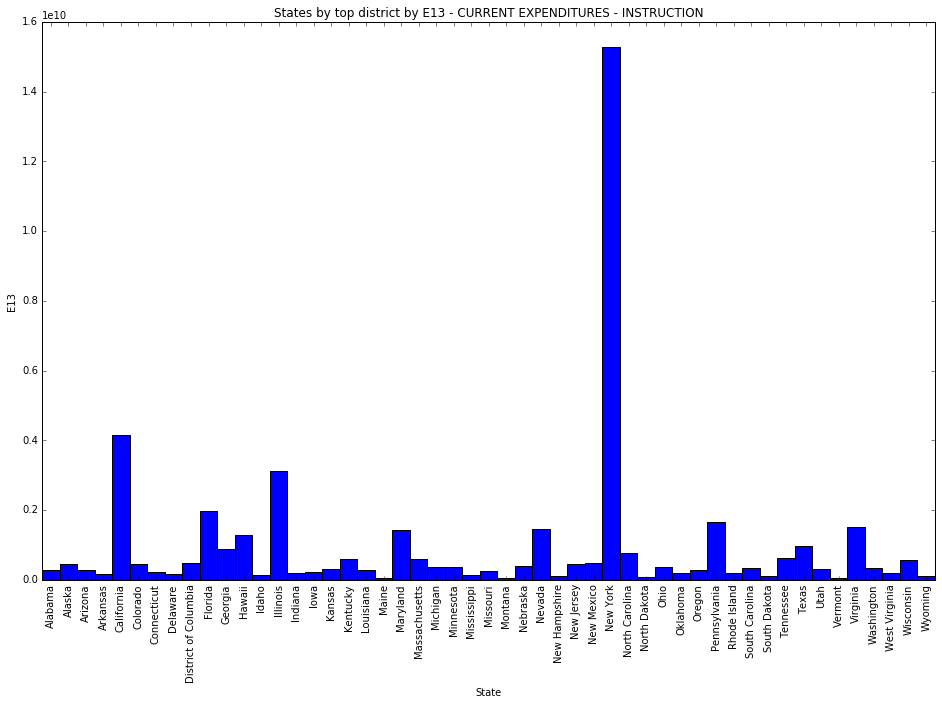

In [41]:
# Plot: Bar Chart - States by top district by ‘E13 - CURRENT EXPENDITURES - INSTRUCTION’

# Configuration
fig, ax = plt.subplots(figsize = (16, 10))

# Number of States on x-axis
x_number = np.arange(len(statelist))

ax.bar(x_number, scorelist, width = 1)

ID = 'States by top district by E13 - CURRENT EXPENDITURES - INSTRUCTION'
plt.title('%s' %ID)
plt.xlabel('State')
plt.ylabel('E13')
plt.xlim(0, len(statelist))

# Plus 0.5 (half the width as width equals 1) to put labels on center
label_number = np.arange(len(statelist)) + 0.5
plt.xticks(label_number, statelist, rotation='vertical')

# Save Plot
filename = '10_%s.jpg' %ID
plt.savefig(filename)